In [1]:
!pip install yfinance
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import yfinance as yf

from IPython.display import display

# Step 1: Download Apple stock data with 'Adj Close'
start = '2014-01-01'
end = '2024-12-31'

df = yf.download('AAPL', start=start, end=end, auto_adjust=False)  # Important: auto_adjust=False

# Display raw (uncleaned) data
print("Raw (Uncleaned) Data:")
display(df.head())

[*********************100%***********************]  1 of 1 completed

Raw (Uncleaned) Data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-01-02,17.215372,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03,16.837221,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07,16.807964,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08,16.914410,19.409286,19.484285,19.238930,19.243214,258529600


In [2]:
# Flatten the column names (even if not multi-index, this will standardize the column names)
df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Display after flattening
print("After flattening the columns:")
display(df.head())

After flattening the columns:


,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
Date,,,,,,
2014-01-02,17.215372,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03,16.837221,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07,16.807964,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08,16.914410,19.409286,19.484285,19.238930,19.243214,258529600


In [3]:
# Reset the index (move 'Date' from index to normal column)
df_reset = df.reset_index()

# Display after resetting index
print("After resetting the index:")
display(df_reset.head())

After resetting the index:


,Date,Adj Close AAPL,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,2014-01-02,17.215372,19.754642,19.893929,19.715000,19.845715,234684800
1,2014-01-03,16.837221,19.320715,19.775000,19.301071,19.745001,392467600
2,2014-01-06,16.929035,19.426071,19.528570,19.057142,19.194643,412610800
3,2014-01-07,16.807964,19.287144,19.498571,19.211430,19.440001,317209200
4,2014-01-08,16.914410,19.409286,19.484285,19.238930,19.243214,258529600


In [4]:
# Removing unnecessary columns (e.g., 'Adj Close' but keeping 'Volume')
df_cleaned = df_reset.drop(columns=['Adj Close AAPL'])

# Display cleaned data (after removing 'Adj Close')
print("Cleaned Data (after removing 'Adj Close AAPL' column):")
display(df_cleaned.head())

Cleaned Data (after removing 'Adj Close AAPL' column):


,Date,Close AAPL,High AAPL,Low AAPL,Open AAPL,Volume AAPL
0,2014-01-02,19.754642,19.893929,19.715000,19.845715,234684800
1,2014-01-03,19.320715,19.775000,19.301071,19.745001,392467600
2,2014-01-06,19.426071,19.528570,19.057142,19.194643,412610800
3,2014-01-07,19.287144,19.498571,19.211430,19.440001,317209200
4,2014-01-08,19.409286,19.484285,19.238930,19.243214,258529600


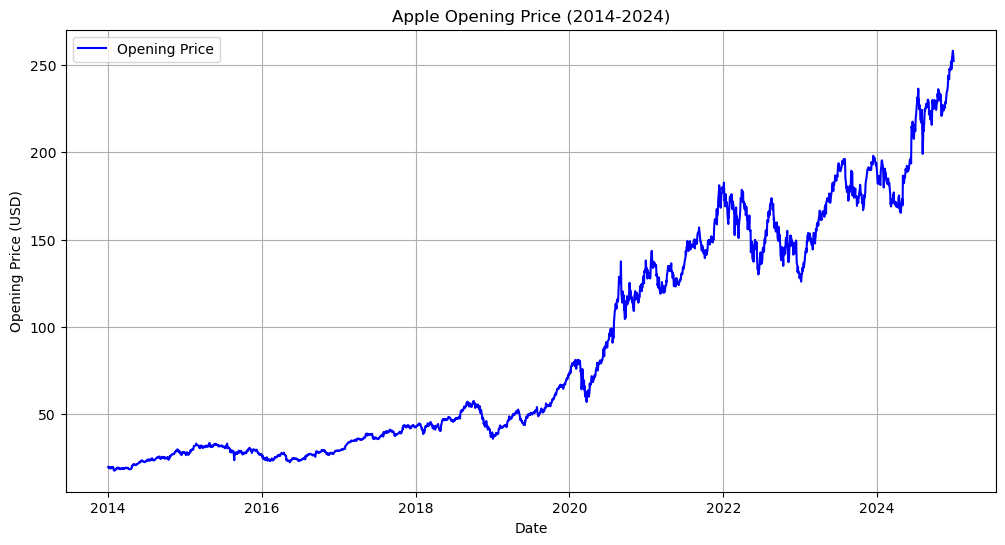

In [5]:
# Plot the Opening Price from the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.title('Apple Opening Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

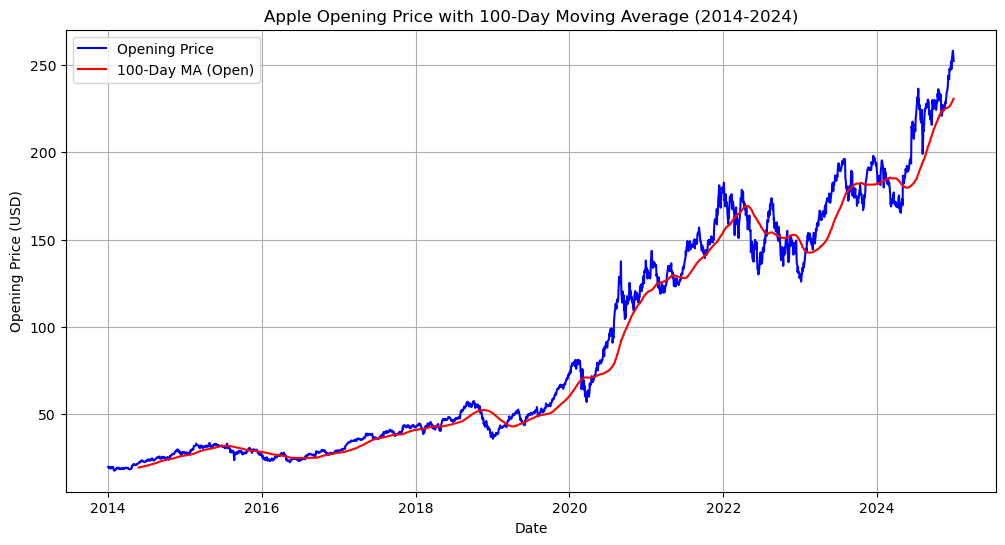

In [6]:
# Calculate 100-day Moving Average of Opening Price
ma100_open = df_cleaned['Open AAPL'].rolling(window=100).mean()

# Plotting the Opening Price and 100-day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma100_open, label='100-Day MA (Open)', color='red')  # Moving average in red
plt.title('Apple Opening Price with 100-Day Moving Average (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

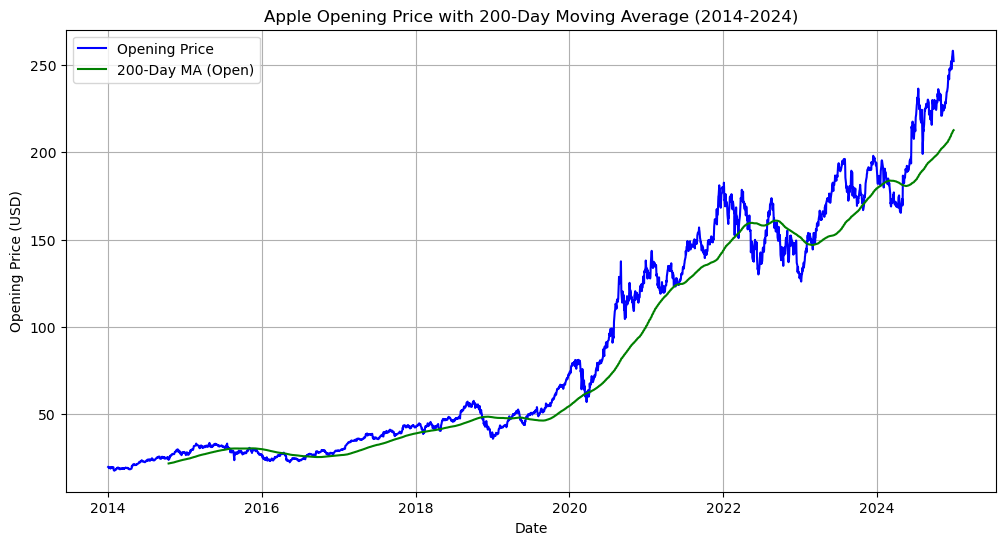

In [7]:
# Calculate 200-Day Moving Average of Opening Price
ma200_open = df_cleaned['Open AAPL'].rolling(window=200).mean()

# Plotting the Opening Price with 200-Day Moving Average
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma200_open, label='200-Day MA (Open)', color='green')  # Moving average in green
plt.title('Apple Opening Price with 200-Day Moving Average (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

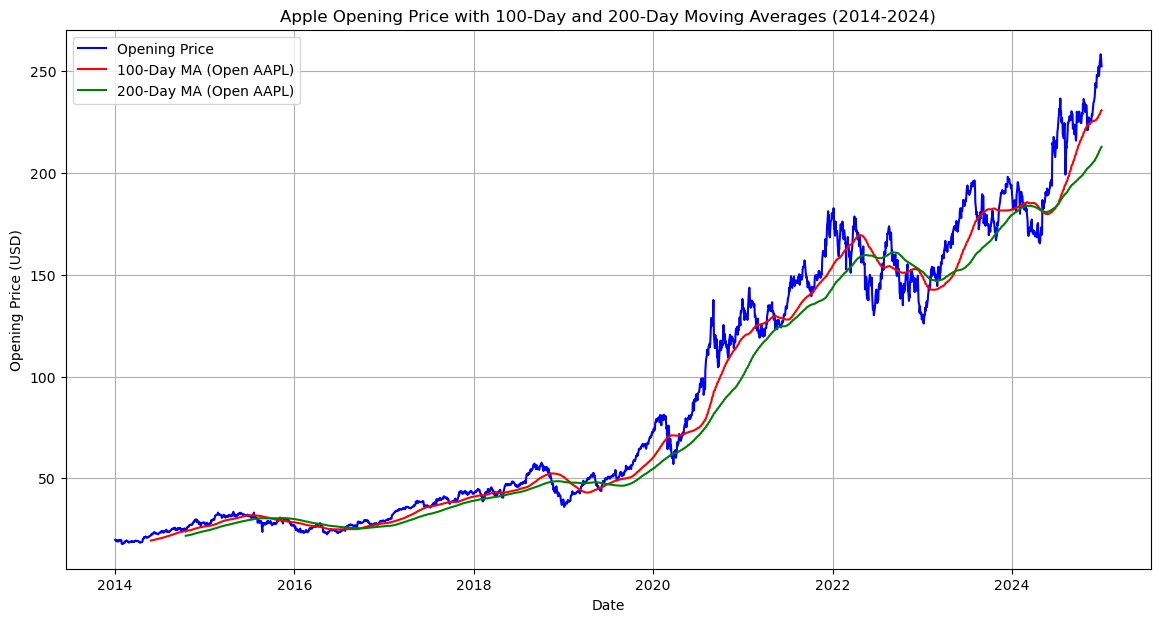

In [8]:
# Calculate 100-day and 200-day Moving Averages of Opening Price
ma100_open = df_cleaned['Open AAPL'].rolling(window=100).mean()
ma200_open = df_cleaned['Open AAPL'].rolling(window=200).mean()

# Plotting the Opening Price with both Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned['Date'], df_cleaned['Open AAPL'], label='Opening Price', color='blue')
plt.plot(df_cleaned['Date'], ma100_open, label='100-Day MA (Open AAPL)', color='red')
plt.plot(df_cleaned['Date'], ma200_open, label='200-Day MA (Open AAPL)', color='green')
plt.title('Apple Opening Price with 100-Day and 200-Day Moving Averages (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

NaN values in each column:
Adj Close AAPL    0
Close AAPL        0
High AAPL         0
Low AAPL          0
Open AAPL         0
Volume AAPL       0
dtype: int64
Infinity values in each column:
Adj Close AAPL    0
Close AAPL        0
High AAPL         0
Low AAPL          0
Open AAPL         0
Volume AAPL       0
dtype: int64
Outliers using IQR method:
Empty DataFrame
Columns: [Adj Close AAPL, Close AAPL, High AAPL, Low AAPL, Open AAPL, Volume AAPL]
Index: []

Outliers using Z-score method:
Empty DataFrame
Columns: [Adj Close AAPL, Close AAPL, High AAPL, Low AAPL, Open AAPL, Volume AAPL]
Index: []


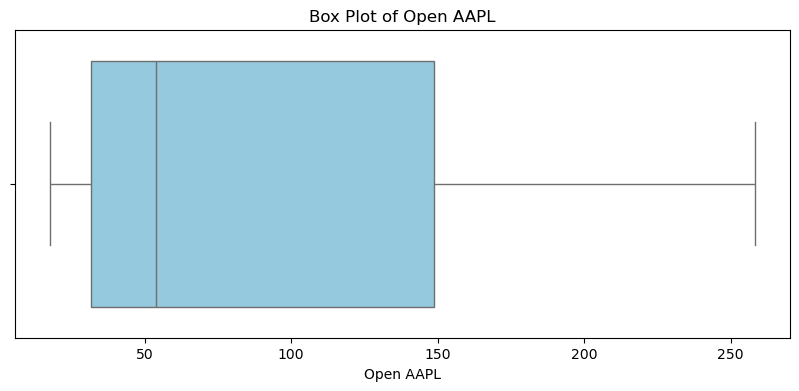

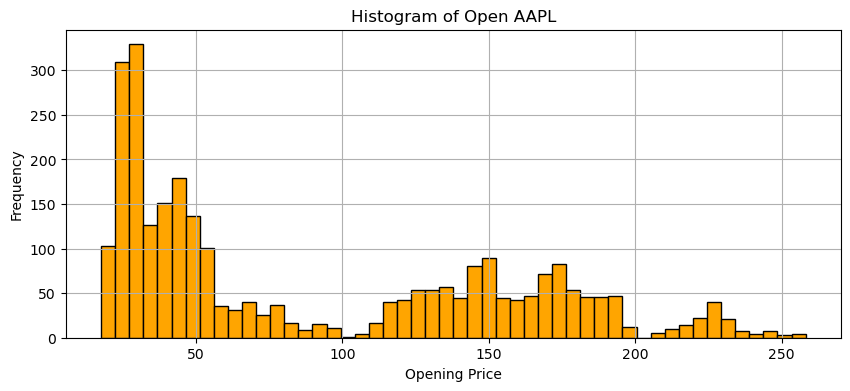


Minimum and Maximum of Open AAPL:
Min: 17.684999465942383
Max: 258.19000244140625

Summary statistics:
count    2767.000000
mean       89.550753
std        65.556990
min        17.684999
25%        31.498750
50%        53.974998
75%       148.815002
max       258.190002
Name: Open AAPL, dtype: float64


In [9]:
# Check for NaN values in the entire dataframe
print("NaN values in each column:")
print(df.isna().sum())
# Check for infinity values in the entire dataframe
print("Infinity values in each column:")
print(np.isinf(df).sum())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. IQR Method
Q1 = df['Open AAPL'].quantile(0.25)
Q3 = df['Open AAPL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df[(df['Open AAPL'] < lower_bound) | (df['Open AAPL'] > upper_bound)]
print("Outliers using IQR method:")
print(iqr_outliers)

# 2. Z-score Method
z_scores = np.abs(stats.zscore(df['Open AAPL']))
z_threshold = 3  # commonly used threshold
z_outliers = df[z_scores > z_threshold]
print("\nOutliers using Z-score method:")
print(z_outliers)

# 3. Box Plot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Open AAPL'], color='skyblue')
plt.title('Box Plot of Open AAPL')
plt.show()

# 4. Histogram
plt.figure(figsize=(10, 4))
plt.hist(df['Open AAPL'], bins=50, color='orange', edgecolor='black')
plt.title('Histogram of Open AAPL')
plt.xlabel('Opening Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 5. Check Min and Max
print("\nMinimum and Maximum of Open AAPL:")
print("Min:", df['Open AAPL'].min())
print("Max:", df['Open AAPL'].max())

# 6. Summary Statistics
print("\nSummary statistics:")
print(df['Open AAPL'].describe())


In [10]:
# Ensure 'df_cleaned' is already created as shown above

# Step 1: Calculate the split index
split_index = int(len(df_cleaned) * 0.70)

# Step 2: Create training and testing datasets
train_data = df_cleaned[:split_index].copy()
test_data = df_cleaned[split_index:].copy()

# Step 3: Print the shapes to verify
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (1936, 6)
Testing data shape: (831, 6)


Train Normalized Min: 0.0
Train Normalized Max: 1.0
Test Normalized Min: 0.7776661443520427
Test Normalized Max: 1.0


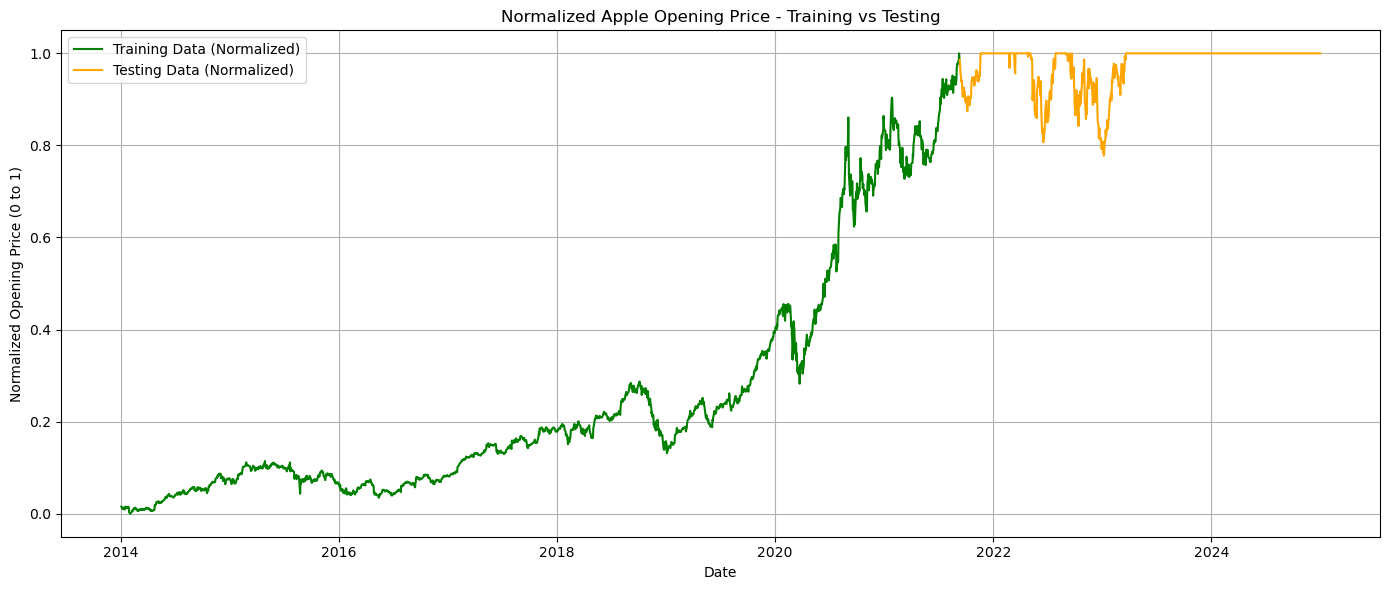

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalizes values between 0 and 1

# Step 2: Fit on training data and transform
train_data['Open_Normalized'] = scaler.fit_transform(train_data[['Open AAPL']])

# Step 3: Use the same scaler to transform test data
test_data['Open_Normalized'] = scaler.transform(test_data[['Open AAPL']])
test_data['Open_Normalized'] = scaler.transform(test_data[['Open AAPL']])
test_data['Open_Normalized'] = test_data['Open_Normalized'].clip(0, 1)



# Optional: Check if values are between 0 and 1
print("Train Normalized Min:", train_data['Open_Normalized'].min())
print("Train Normalized Max:", train_data['Open_Normalized'].max())
print("Test Normalized Min:", test_data['Open_Normalized'].min())
print("Test Normalized Max:", test_data['Open_Normalized'].max())
import matplotlib.pyplot as plt

# Plot the normalized training and testing data
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['Open_Normalized'], label='Training Data (Normalized)', color='green')
plt.plot(test_data['Date'], test_data['Open_Normalized'], label='Testing Data (Normalized)', color='orange')

plt.title('Normalized Apple Opening Price - Training vs Testing')
plt.xlabel('Date')
plt.ylabel('Normalized Opening Price (0 to 1)')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Add moving averages to the DataFrame as new features
df_cleaned['MA_100'] = df_cleaned['Open AAPL'].rolling(window=100).mean()
df_cleaned['MA_200'] = df_cleaned['Open AAPL'].rolling(window=200).mean()
print(df_cleaned[['Open AAPL', 'MA_100', 'MA_200']].head())


   Open AAPL  MA_100  MA_200
0  19.845715     NaN     NaN
1  19.745001     NaN     NaN
2  19.194643     NaN     NaN
3  19.440001     NaN     NaN
4  19.243214     NaN     NaN


In [13]:
!pip install tensorflow

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assume df_cleaned is your working DataFrame
# Normalize the 'Open AAPL' column
scaler = MinMaxScaler(feature_range=(0, 1))
df_cleaned['Open_Normalized'] = scaler.fit_transform(df_cleaned[['Open AAPL']])

# Split data into train and test sets
data = df_cleaned['Open_Normalized'].values
sequence_length = 60
train_size = int(len(data) * 0.8)
train_data = pd.DataFrame(data[:train_size], columns=['Open_Normalized'])
test_data = pd.DataFrame(data[train_size:], columns=['Open_Normalized'])

# Function to create sequences
def create_sequences(data):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Prepare sequences
X_train, y_train = create_sequences(train_data['Open_Normalized'].values)
X_test, y_test = create_sequences(test_data['Open_Normalized'].values)

# Reshape for LSTM input: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))




C:\Users\nandh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - loss: 0.0122 - val_loss: 0.0066
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0013 - val_loss: 9.9582e-04
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 9.6254e-04 - val_loss: 0.0027
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 9.1680e-04 - val_loss: 0.0034
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 8.1372e-04 - val_loss: 0.0027
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 6.8774e-04 - val_loss: 0.0016
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 8.1064e-04 - val_loss: 0.0020
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 8.4293e-04 - val_loss: 0.0031
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 6.8916e-04 - val_loss: 0.0032
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 6.5099e-04 - val_loss: 9.7099e-04
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 6.1713e-04 - val_loss: 6.1273e-04
Epoch 12/20
68

In [20]:
#model saving
model.save('lstm_model.keras')